## Language distribution plots

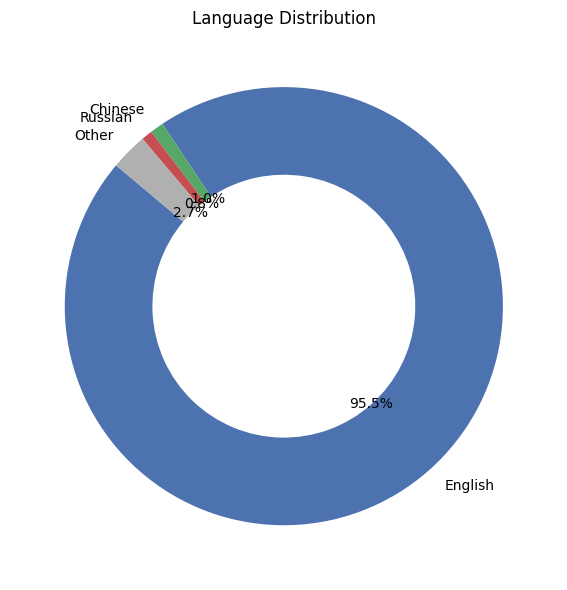

In [1]:
import matplotlib.pyplot as plt

# Data
labels = ['English', 'Chinese', 'Russian', 'Other']
sizes = [11615, 121, 99, 332]

# Colors
colors = ['#4c72b0', '#55a868', '#c44e52', '#b0b0b0']

# Plot
fig, ax = plt.subplots(figsize=(6, 6))
wedges, texts, autotexts = ax.pie(
    sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors,
    wedgeprops=dict(width=0.4)
)

ax.set_title("Language Distribution")
plt.tight_layout()
plt.show()

C:\Users\jackp\AppData\Local\Temp\ipykernel_6748\1604898784.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Percentage', y='Language', data=df, palette='muted')


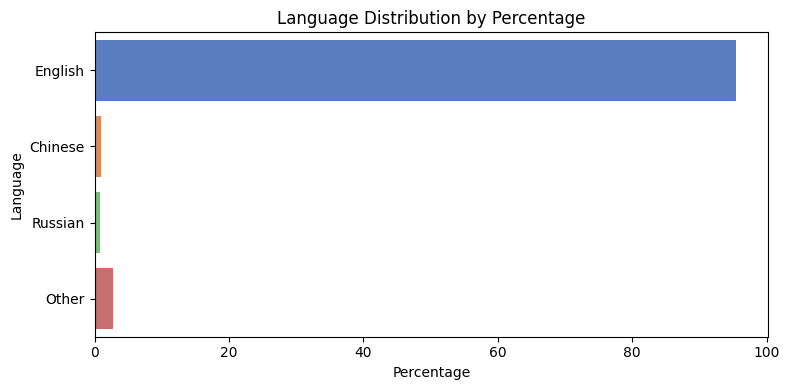

In [2]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Data
data = {
    'Language': ['English', 'Chinese', 'Russian', 'Other'],
    'Count': [11615, 121, 99, 332]
}
df = pd.DataFrame(data)
df['Percentage'] = (df['Count'] / df['Count'].sum() * 100).round(2)

# Plot
plt.figure(figsize=(8, 4))
sns.barplot(x='Percentage', y='Language', data=df, palette='muted')
plt.title("Language Distribution by Percentage")
plt.xlabel("Percentage")
plt.ylabel("Language")
plt.tight_layout()
plt.show()


## Citation plots

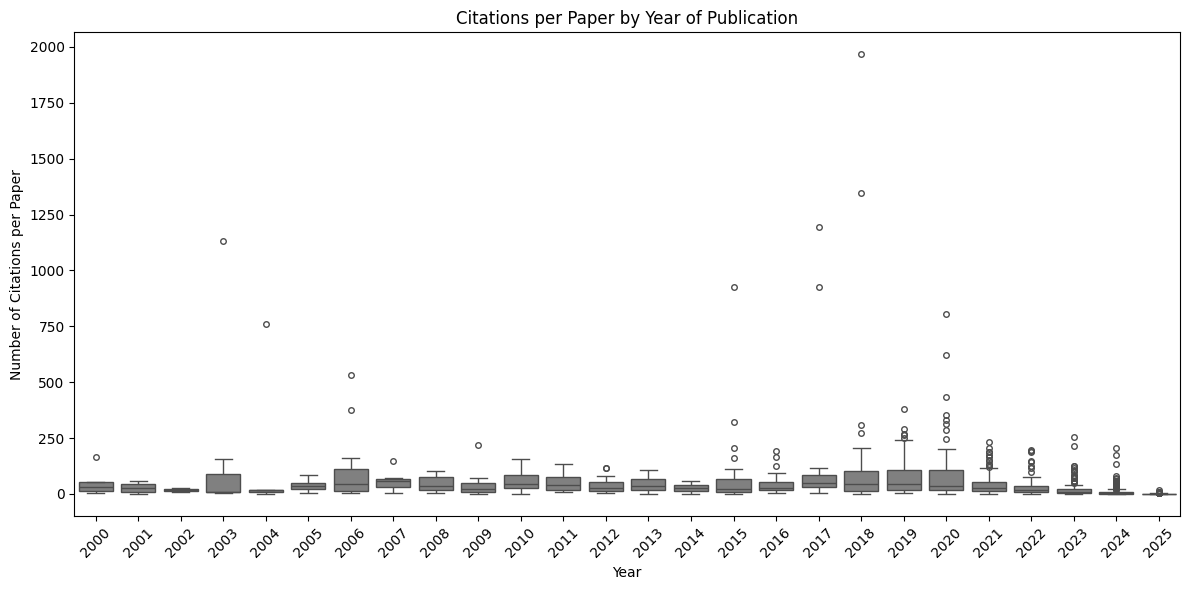

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

# Get the path to the current notebook
notebook_dir = Path(__file__).parent if '__file__' in globals() else Path.cwd()

# Navigate to the file: one level up, then into datasets
filepath = notebook_dir.parent / "datasets" / "Q1_eng_compsci_econ.xlsx"

df = pd.read_excel(filepath, header=0)
# print(df.head())


# Plotting boxplot like in Pierre's paper
plt.figure(figsize=(12, 6))
sns.boxplot(x="Year", y="Cited by", data=df, color="grey", fliersize=4)
plt.xticks(rotation=45)
# plt.yscale('log')
# plt.ylim(0.9, 2500)
# plt.ylim(-100, 2500)
# plt.ylim(-5, 200)
plt.ylabel("Number of Citations per Paper")
plt.title("Citations per Paper by Year of Publication")
# plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


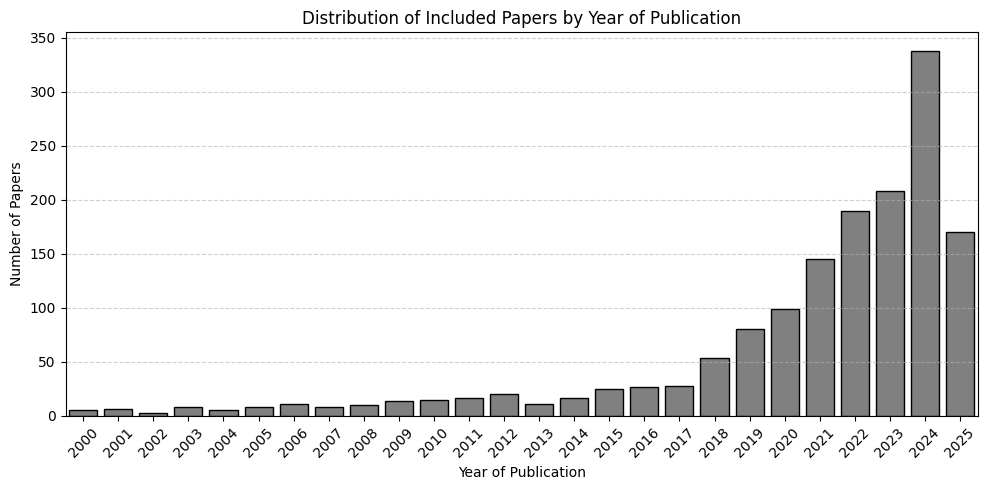

1522

In [4]:

# Create a bar plot showing the number of papers per year
plt.figure(figsize=(10, 5))
sns.countplot(x="Year", data=df, color="grey", ec="black")
plt.title("Distribution of Included Papers by Year of Publication")
plt.xlabel("Year of Publication")
plt.ylabel("Number of Papers")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()
len(df)


In [2]:

papers = pd.read_excel(filepath, header=0)

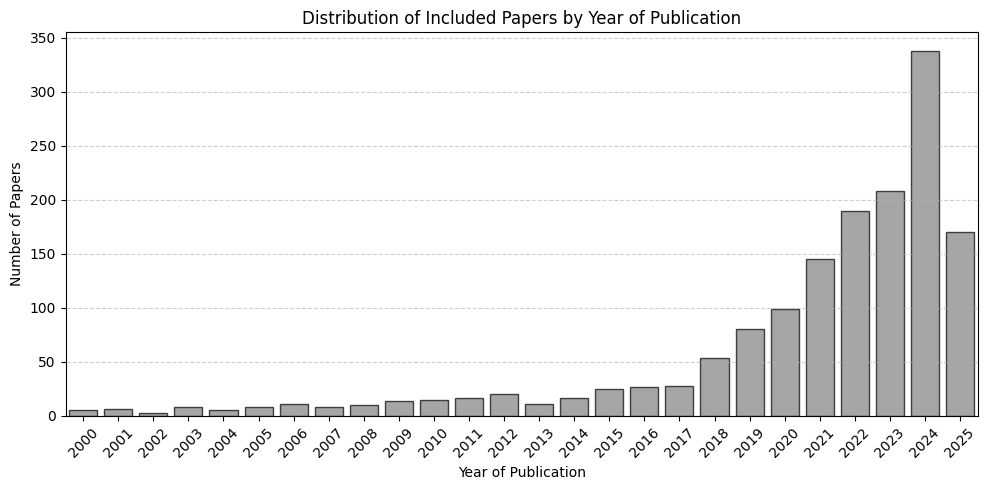

3283

In [ ]:

# Create a bar plot showing the number of papers per year
plt.figure(figsize=(10, 5))
sns.countplot(x="Year", data=papers, color="grey", ec="black", alpha=0.7)
plt.title("Distribution of Included Papers by Year of Publication")
plt.xlabel("Year of Publication")
plt.ylabel("Number of Papers")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


# Saving the plot as a PNG file
plt.savefig('papers_per_year_all_areas.png')
plt.show()


## Application area plots


In [3]:
import pandas as pd
from pathlib import Path

# Get the path to the current notebook
notebook_dir = Path(__file__).parent if '__file__' in globals() else Path.cwd()

# Navigate to the file: one level up, then into datasets
filepath = notebook_dir.parent / "datasets" / "Q1_scopus_papers_verified.xlsx"

df = pd.read_excel(filepath, header=0)

# Define target areas (case-insensitive match)
target_areas = ["engineering", "computer science", "economics, econometrics and finance"]

# Create a mask to check if any target area is present
mask = df["Areas"].astype(str).str.lower().apply(
    lambda x: any(area in x for area in target_areas)
)

# Count matching rows
matching_count = mask.sum()
print(f"Matching papers: {matching_count}")


Matching papers: 1522


## Access status plots

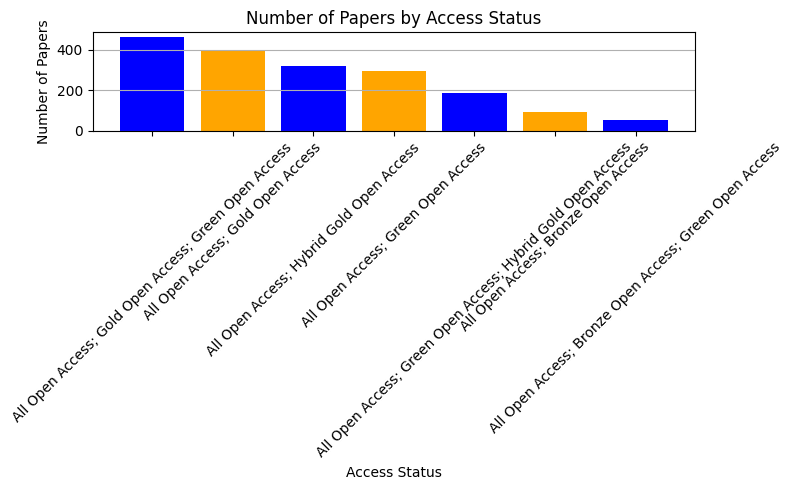

In [14]:

# First, I will check the relevant columns for openness/access status in the dataframe.
# Assuming there is a column named 'Access' that indicates whether a paper is open access or not.

# Counting the number of papers based on their access status
access_counts = df['Open Access'].value_counts().reset_index()
access_counts.columns = ['Access Status', 'Number of Papers']

# Creating the bar plot
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.bar(access_counts['Access Status'], access_counts['Number of Papers'], color=['blue', 'orange'])
plt.title('Number of Papers by Access Status')
plt.xlabel('Access Status')
plt.ylabel('Number of Papers')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()